In [1]:
'''------------------------
| Import Required Modules |
------------------------'''
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

In [2]:
'''-------------------
| Generate Test Data |
-------------------'''
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

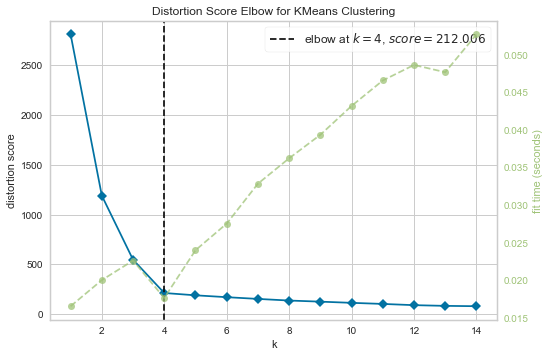

In [3]:
'''-----------------
| Determine Best K |
-----------------'''
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))
visualizer.fit(X)
visualizer.show()
# TODO calculate accuracy for best K
# TODO draw a confusion matrix

In [17]:
'''---------------
| Generate Model |
---------------'''

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)

In [18]:
'''--------------
| Assign Labels |
--------------'''

from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(4):
    # this is similar to another for loop to check every element of clusters
    # group all the elements of clusters == i, then assign these elements to mask
    mask = (clusters == i)
    labels[mask] = mode(y_true[mask])[0]
    
print(labels.shape)
print(labels)

(300,)
[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


In [19]:
'''----------------
| Assess Accuracy |
----------------'''

from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)

1.0

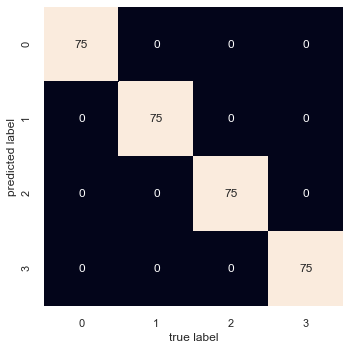

In [20]:
'''-----------------
| Confusion Matrix |
-----------------'''

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_true, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0, 1, 2, 3],
            yticklabels=[0, 1, 2, 3])
plt.xlabel('true label')
plt.ylabel('predicted label');